# Weighting query terms to improve BM25 retrieval

In [31]:
import csv
import matplotlib.pyplot as plt
from src.retrieval import PyLuceneRetriever, ReCodeRetriever, OracleBLEURetriever
%matplotlib inline  

In [45]:
# takes a few seconds
collection = {}
with open('datasets/MS_Marco/collection.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for i, row in enumerate(reader):
        passage_id, passage_text = row
        collection[int(passage_id)] = passage_text

In [46]:
train_queries = {}
with open('datasets/MS_Marco/queries.train.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for i, row in enumerate(reader):
        q_id, q_text = row
        train_queries[int(q_id)] = q_text

In [47]:
train_q_rels = {}
with open('datasets/MS_Marco/qrels.train.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for i, row in enumerate(reader):
        q_id, _, passage_id, _ = row
        if int(q_id) in train_q_rels:
            train_q_rels[int(q_id)].append(int(passage_id))
        else:
            train_q_rels[int(q_id)] = [int(passage_id)]

(array([4.7758e+05, 2.1868e+04, 0.0000e+00, 2.7180e+03, 0.0000e+00,
        6.1200e+02, 1.3100e+02, 0.0000e+00, 2.2000e+01, 8.0000e+00]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

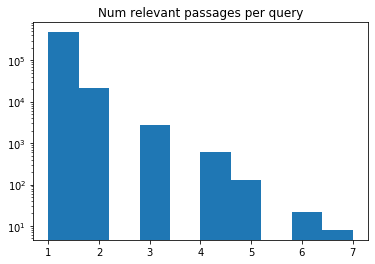

In [48]:
plt.title('Num relevant passages per query')
plt.hist([len(rel_passages) for q_id, rel_passages in train_q_rels.items()],log=True)

## Importing passages into PyLucene

In [106]:
ordered_passages = [v for k, v in sorted(collection.items(), key=lambda item: item[0])]

In [107]:
print(f"All passages {len(ordered_passages)}")

All passages 8841823


In [108]:
%%time
retriever = PyLuceneRetriever()
retriever.add_multiple_docs(ordered_passages[:10_000])

JVM Running
CPU times: user 801 ms, sys: 674 ms, total: 1.47 s
Wall time: 370 ms


In [109]:
k = 3
results = retriever.search("war", max_retrieved_docs=100)
print(f"{len(results)} results")
top_k_passages = [ordered_passages[passage_id] for passage_id, sccore in results[:k]]
for p in top_k_passages:
    print(p)
    print()

100 results
Answers.com Â® WikiAnswers Â® Categories History, Politics & Society History War and Military History US Civil War US Civil War Battles Second Battle of Bull Run Where did the battle of second Manassas take place?

British declaration of war in WW1 In WW1 Britain declared war on Germany on 4 August 1914 shortly after German troops entered Belgium. British declaration of war in WW2 In â¦ WW2 Britain declared war on Germany on 3 September 1939.The British Prime Minister, Neville Chamberlain, declared war on Germany on September 3, 1939, two days after the Nazi Germans invaded and attacked Poland.Obviously, he did so with the backing of Parliament.3rd September 1939. It was a joint declaration of war by Britain and France.reat Britain declared war on Germany and did not come to the rescue of Poland as they had intended to do. They did try to help France defeat the Nazi Germans. It was a failur â¦ e. There was a period of about 4 months duration (I believe it was that long) t

In [116]:
train_queries[1185869]

')what was the immediate impact of the success of the manhattan project?'